In [1]:
#Vtk generation
import flopy ## Org
from mf6Voronoi.tools.vtkGen import Mf6VtkGenerator ## Org
from mf6Voronoi.utils import initiateOutputFolder ## Org

In [2]:
import os
os.listdir('../../../../mf6models')
#!pip install -U flopy --break-system-packages

['ex-gwf-advtidal',
 'ex-gwf-bcf2ss-p01a',
 'ex-gwf-fhb',
 'ex-gwf-toth',
 'ex-gwf-twri01',
 'hillslopeModel',
 'openPit',
 'regionalModel']

In [3]:
# load simulation
simName = 'mf6Sim' ## Org
modelName = 'mf6Model' ## Org
modelWs = '../../../../mf6models/ex-gwf-fhb' ## Org
sim = flopy.mf6.MFSimulation.load(sim_name=simName, version='mf6', ## Org
                             exe_name='../../../../bin/mf6', ## Org
                             sim_ws=modelWs) ## Org

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package npf...
    loading package ic...
    loading package sto...
    loading package chd...
    loading package wel...
    loading package oc...
    loading package obs...
  loading solution package ex-gwf-fhb...


In [4]:
sim.run_simulation()

FloPy is using the following executable to run the model: ../../bin/mf6
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.6.0 12/20/2024

   MODFLOW 6 compiled Dec 31 2024 17:08:41 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government shall be 

(True, [])

In [5]:
sim.model_names

['ex-gwf-fhb']

In [6]:
gwf = sim.get_model('ex-gwf-fhb') ## Org

In [7]:
head = gwf.output.head().get_data()
bud = gwf.output.budget()
spdis = bud.get_data(text='DATA-SPDIS')[0]
spdis

rec.array([( 1,  1, 0., 0.0026598 ,  2.65996069e-03, 0.),
           ( 2,  2, 0., 0.00293731,  5.55165516e-04, 0.),
           ( 3,  3, 0., 0.00327269,  1.15869664e-04, 0.),
           ( 4,  4, 0., 0.00334259,  2.41833806e-05, 0.),
           ( 5,  5, 0., 0.0033571 ,  5.04735920e-06, 0.),
           ( 6,  6, 0., 0.00336007,  1.05344048e-06, 0.),
           ( 7,  7, 0., 0.00336063,  2.19848707e-07, 0.),
           ( 8,  8, 0., 0.00336071,  4.58018132e-08, 0.),
           ( 9,  9, 0., 0.0033607 ,  9.16019165e-09, 0.),
           (10, 10, 0., 0.00336069,  0.00000000e+00, 0.),
           (11, 11, 0., 0.0047646 , -8.26983881e-14, 0.),
           (12, 12, 0., 0.00420936, -9.61320325e-14, 0.),
           (13, 13, 0., 0.00353818, -2.39697178e-14, 0.),
           (14, 14, 0., 0.003398  , -3.07442958e-14, 0.),
           (15, 15, 0., 0.00336867, -7.91589135e-16, 0.),
           (16, 16, 0., 0.00336248,  3.62043729e-14, 0.),
           (17, 17, 0., 0.00336113,  3.32489591e-14, 0.),
           (18

In [8]:
import numpy as np
hactive = head[head>gwf.hdry]
hactive = head[head<gwf.hnoflo]
levels = np.linspace(hactive.min(),hactive.max(),10)
levels


array([2.        , 2.63517462, 3.27034924, 3.90552385, 4.54069847,
       5.17587309, 5.81104771, 6.44622233, 7.08139694, 7.71657156])

import matplotlib.pyplot as plt ## Org
fig, ax = plt.subplots(figsize=(10, 10)) ## Org

qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, gwf)
pmv = flopy.plot.PlotMapView(gwf, layer=5)
pmv.plot_grid(colors='crimson', lw=0.3, alpha=0.5,ax=ax, zorder=1) ## Org
pmv.plot_array(head[5], masked_values=[1e+30], cmap='viridis', 
               alpha=0.5, ax=ax, zorder=2) ## Org
pmv.contour_array(head, levels=levels, linewidths=3., ax=ax,
                  zorder=3)
pmv.plot_vector(qx, qy, normalize=True, color="crimson", 
                masked_values=[0], scale_units='width',scale=20, 
                istep=4,
                jstep=4,
                ax=ax,
                zorder=4)
#ax.set_xlim(552000, 553000) ## Org
#ax.set_ylim(5307500, 5308500) ## Org

In [9]:
backgroundImageDict = {
    'fig':'Png/backgroundImage.png',
    'wrl':'Png/backgroundImage.pgw'
}

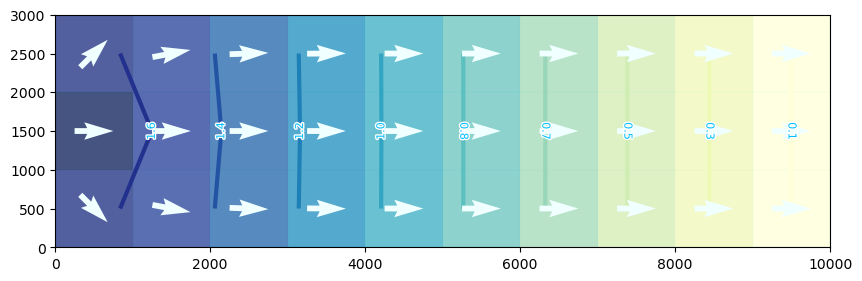

In [15]:
from mf6Voronoi.tools.graphs2d import FlowVectorGenerator
FlowVectorGenerator(gwf, layer=0, plotGrid=True,
                    scale=20,
                    istep=1,
                    jstep=1)